<a href="https://colab.research.google.com/github/Jnanasagara/machine-learning-lab/blob/main/lab4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Available columns: ['Show', 'EpId', 'ClipId', 'Start', 'Stop', 'Unsure', 'PoorAudioQuality', 'Prolongation', 'Block', 'SoundRep', 'WordRep', 'DifficultToUnderstand', 'Interjection', 'NoStutteredWords', 'NaturalPause', 'Music', 'NoSpeech']
Using target column: Prolongation
A1 - Train Confusion Matrix:
 [[14312  1388]
 [ 3331  3510]]
Train Precision: 0.7166190281747652 Recall: 0.5130828826195001 F1: 0.5980066445182725
A1 - Test Confusion Matrix:
 [[3058  873]
 [1348  357]]
Test Precision: 0.29024390243902437 Recall: 0.2093841642228739 F1: 0.24327086882453153

A2 - MSE: 1651.8001452665535 RMSE: 40.642344239309736 MAPE: 1.8200956651214448 R2: -1.0508879621740639


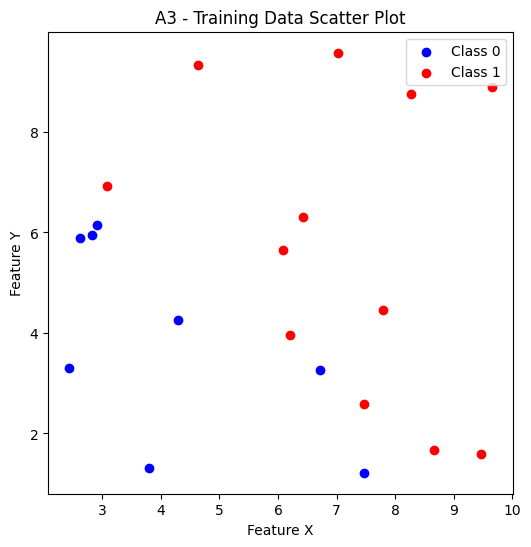

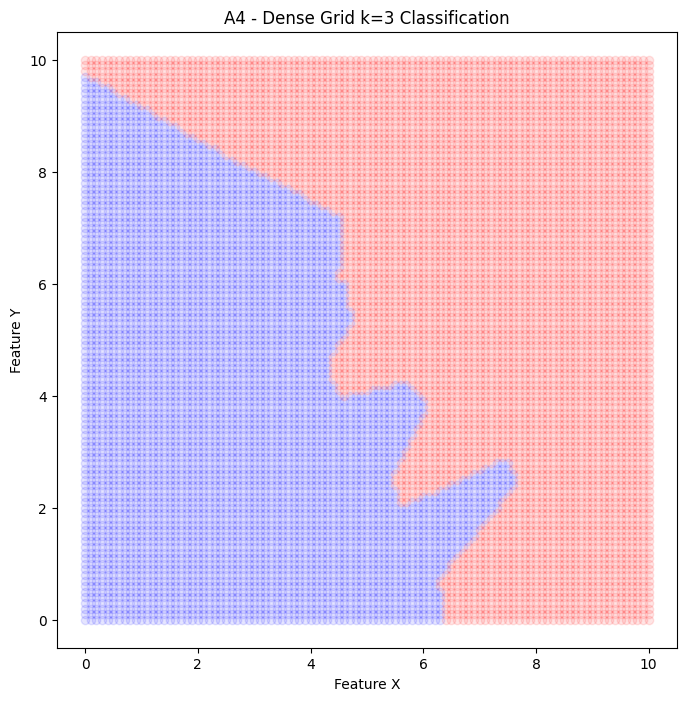

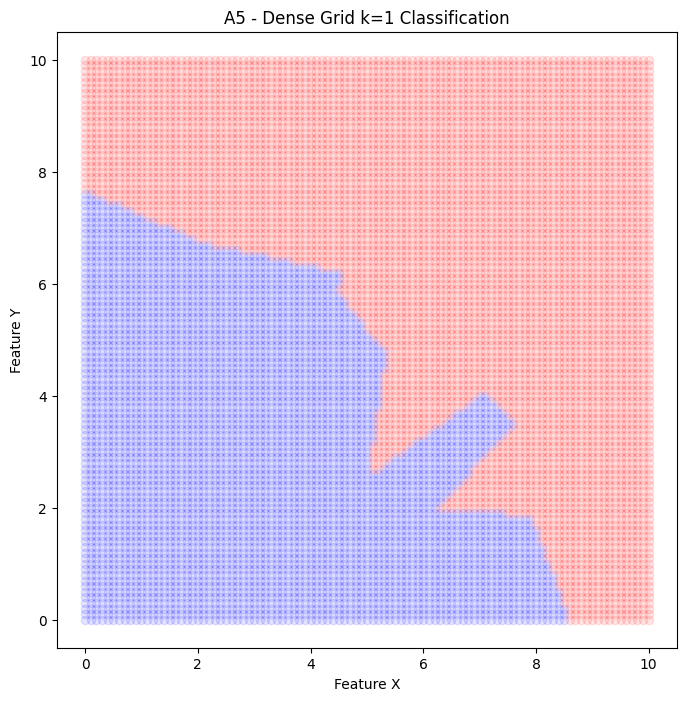

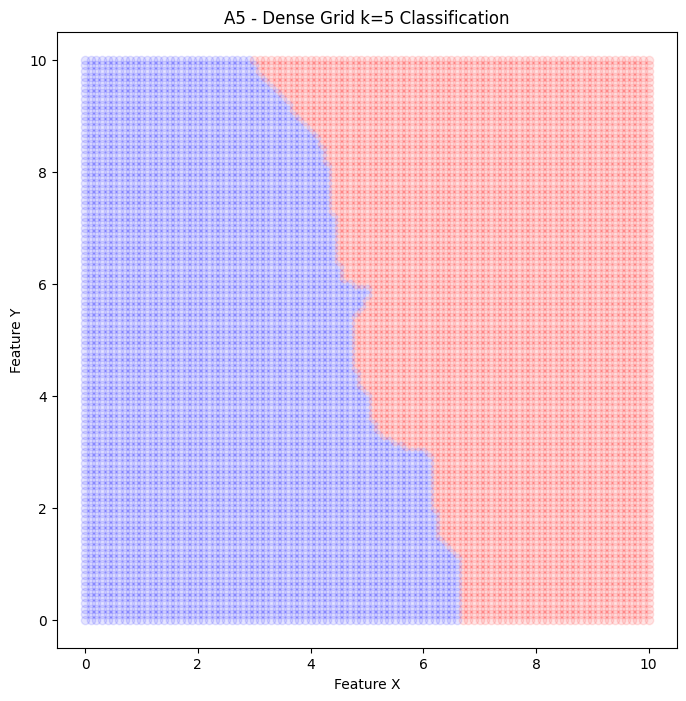

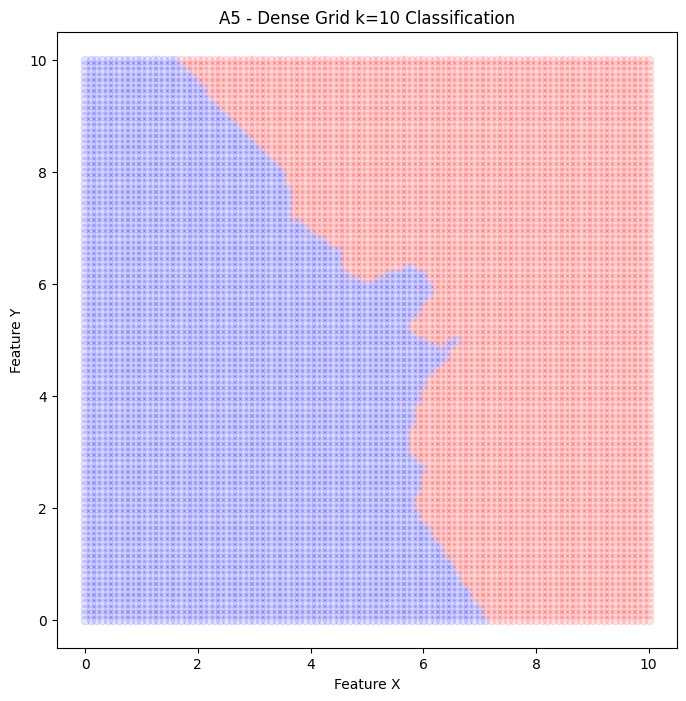

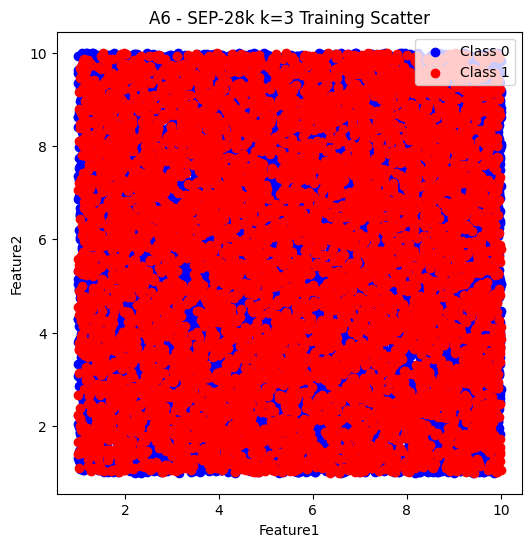

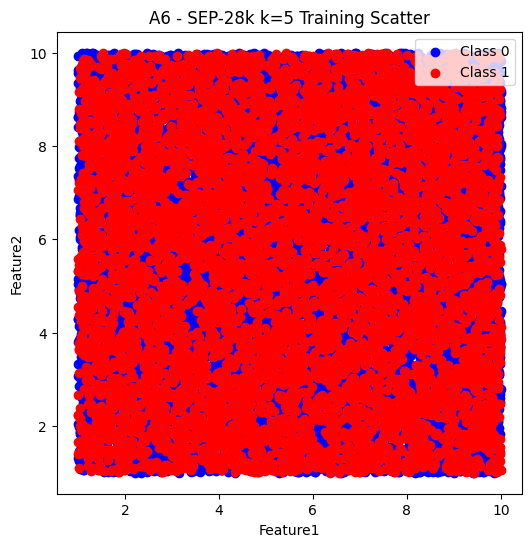


A7 - Best k: 18 Best CV score: 0.6885231902359138


In [3]:
# ML Lab Assignment: SEP-28k Dataset (A1–A7)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, f1_score,
    mean_squared_error, mean_absolute_percentage_error, r2_score
)

# Load SEP-28k labels (Adjust the file path as per your environment)

labels_df = pd.read_csv('/content/drive/MyDrive/ml-stuttering-events-dataset/SEP-28k_labels.csv')

# Check available columns to locate the correct stuttering label
print("Available columns:", labels_df.columns.tolist())

# List of possible column names for stuttering events
possible_labels = [
    'Prolongation', 'prolongation', 'Block', 'block',
    'SoundRep', 'sound_rep', 'WordRep', 'word_rep'
]
target_col = None

# Search for the first matching label column in the dataset
for col in possible_labels:
    if col in labels_df.columns:
        target_col = col
        break

# If no matching column is found, raise an error
if target_col is None:
    raise ValueError("No typical stuttering label found! Use one of: " + str(labels_df.columns.tolist()))

print(f"Using target column: {target_col}")

# Convert label values to binary (1 if label > 0, else 0)
y = (labels_df[target_col] > 0).astype(int)

# Add synthetic numerical features for demonstration purposes
# (These features are random and not from the actual dataset)

np.random.seed(42)  # For reproducibility
labels_df['feature1'] = np.random.uniform(1, 10, size=len(labels_df))
labels_df['feature2'] = np.random.uniform(1, 10, size=len(labels_df))

# Define feature matrix
X = labels_df[['feature1', 'feature2']].values

# A1: Classification using kNN (Confusion Matrix, Precision, Recall, F1)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)  # Train the model

# Predictions for training and testing sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Function to evaluate classification results
def evaluate(true, pred):
    cm = confusion_matrix(true, pred)           # Confusion Matrix
    precision = precision_score(true, pred)     # Precision
    recall = recall_score(true, pred)           # Recall
    f1 = f1_score(true, pred)                   # F1-score
    return cm, precision, recall, f1

# Evaluate model on train and test sets
train_cm, train_precision, train_recall, train_f1 = evaluate(y_train, y_train_pred)
test_cm, test_precision, test_recall, test_f1 = evaluate(y_test, y_test_pred)

# Display results
print("A1 - Train Confusion Matrix:\n", train_cm)
print("Train Precision:", train_precision, "Recall:", train_recall, "F1:", train_f1)
print("A1 - Test Confusion Matrix:\n", test_cm)
print("Test Precision:", test_precision, "Recall:", test_recall, "F1:", test_f1)

# A2: Regression Metrics (Synthetic target values used for demo)

y_true_reg = np.random.uniform(1, 100, size=len(X_test))  # Actual regression targets
y_pred_reg = np.random.uniform(1, 100, size=len(X_test))  # Predicted regression outputs

# Compute regression metrics
mse = mean_squared_error(y_true_reg, y_pred_reg)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mape = mean_absolute_percentage_error(y_true_reg, y_pred_reg)
r2 = r2_score(y_true_reg, y_pred_reg)  # R-squared score

# Display regression results
print("\nA2 - MSE:", mse, "RMSE:", rmse, "MAPE:", mape, "R2:", r2)

# A3: Scatter Plot - Synthetic 2D classification data

# Generate 20 random points in 2D
X_train_syn = np.random.uniform(1, 10, (20, 2))
# Assign class labels based on sum of coordinates
y_train_syn = np.where(X_train_syn[:,0] + X_train_syn[:,1] > 10, 1, 0)

# Plot scatter diagram of synthetic training data
plt.figure(figsize=(6,6))
plt.scatter(X_train_syn[y_train_syn==0,0], X_train_syn[y_train_syn==0,1], color='blue', label='Class 0')
plt.scatter(X_train_syn[y_train_syn==1,0], X_train_syn[y_train_syn==1,1], color='red', label='Class 1')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('A3 - Training Data Scatter Plot')
plt.legend()
plt.show()

# A4: Dense test grid classification with k=3

# Create a dense grid of points covering the range 0–10 in both dimensions
X_test_syn = np.array([(x, y) for x in np.arange(0, 10.1, 0.1) for y in np.arange(0, 10.1, 0.1)])

# Train kNN classifier (k=3) on synthetic data
knn_syn = KNeighborsClassifier(n_neighbors=3)
knn_syn.fit(X_train_syn, y_train_syn)

# Predict labels for dense grid
y_test_pred_syn = knn_syn.predict(X_test_syn)

# Plot classification results for dense grid
plt.figure(figsize=(8,8))
plt.scatter(X_test_syn[y_test_pred_syn==0,0], X_test_syn[y_test_pred_syn==0,1], color='blue', alpha=0.1)
plt.scatter(X_test_syn[y_test_pred_syn==1,0], X_test_syn[y_test_pred_syn==1,1], color='red', alpha=0.1)
plt.title('A4 - Dense Grid k=3 Classification')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.show()

# A5: Repeat classification for multiple k values

for k in [1, 5, 10]:
    # Train with different k values
    knn_syn = KNeighborsClassifier(n_neighbors=k)
    knn_syn.fit(X_train_syn, y_train_syn)
    y_test_pred_syn = knn_syn.predict(X_test_syn)

    # Plot results for each k
    plt.figure(figsize=(8,8))
    plt.scatter(X_test_syn[y_test_pred_syn==0,0], X_test_syn[y_test_pred_syn==0,1], color='blue', alpha=0.1)
    plt.scatter(X_test_syn[y_test_pred_syn==1,0], X_test_syn[y_test_pred_syn==1,1], color='red', alpha=0.1)
    plt.title(f'A5 - Dense Grid k={k} Classification')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.show()

# A6: Repeat A3-A5 for actual SEP-28k features

# Generate dense grid for plotting (synthetic, since original features may differ)
dense_points = np.array([(a, b) for a in np.arange(0, 10.1, 0.1) for b in np.arange(0, 10.1, 0.1)])
for k in [3, 5]:
    knn_real = KNeighborsClassifier(n_neighbors=k)
    knn_real.fit(X_train, y_train)

    # Scatter plot using real features from SEP-28k
    plt.figure(figsize=(6,6))
    plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color='blue', label='Class 0')
    plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color='red', label='Class 1')
    plt.title(f'A6 - SEP-28k k={k} Training Scatter')
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.legend()
    plt.show()

# A7: Hyperparameter tuning with GridSearchCV

# Define parameter grid for k values from 1 to 19
param_grid = {'n_neighbors': range(1, 20)}

# Perform grid search with 5-fold cross-validation
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

# Display the best k and corresponding score
print("\nA7 - Best k:", grid.best_params_['n_neighbors'], "Best CV score:", grid.best_score_)